# Curso BancoEstado-CMM: Aprendizaje de Máquinas Avanzado 
**Autores:** Taco de Wolff y Felipe Tobar  

**Fecha:** 30 octubre, 2019


# Módulo 5 - Modelos paramétricos y redes neuronales usando PyTorch
**Contenidos**
- ¿Qué es PyTorch y cómo se compara con NumPy?
- Construir y entrenar una Red Neuronal

## Introducción
PyTorch es una librería basado en Python para computaciones escientíficas con el objetivo de reemplazar NumPy para utilizar el poder de GPU, y proveer una media de investigaciones aprendizaje profunda con velocidad y flexibilidad. También existe TensorFlow que proviene más o menos lo mismo, pero una de las principales diferencias entre TensorFlow y PyTorch es que TensorFlow genera grafos estaticos, que deben ser construidos por completo antes de evaluarlos, en cambio PyTorch presenta grafos dinámicos, pueden ser modificados y evaluados por nodo.

Características de PyTorch:
* Permite trabajo en tensores, similares a NumPy array pero permitiendo operaciones en la GPU.
* Diferenciación automática para construir y entrenar modelos, en particular redes neuronales.
* La gran diferencia con usar NumPy es que PyTorch (al igual que TensorFlow) construyen un grafo de computación, que luego es alimentado con los valores.

Instalar con `conda install pytorch torchvision cpuonly -c pytorch`.

In [2]:
import torch

## Tensores
Un tensor de PyTorch es similar al `ndarray` de NumPy. Exploremos que son tensores con código. Podemos alocar un tensor sin initializar sus valores con `torch.empty(shape)`. Esta nos da un tensor con valores que estaban en el memoria antes y es necesario initializar todos valores nosostros mismos.

In [3]:
torch.empty(5, 3)

tensor([[ 0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00, -2.3203e+31,  4.5891e-41],
        [-2.3203e+31,  4.5891e-41, -2.3205e+31],
        [ 4.5891e-41, -2.3205e+31,  4.5891e-41],
        [-2.3205e+31,  4.5891e-41, -2.3205e+31]])

También existen funciones que initializan los valores automaticamente:

In [4]:
torch.zeros(5, 3)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

Y con valores aleatoreas entre `0` y `1`:

In [5]:
torch.rand(5, 3)

tensor([[0.8369, 0.0901, 0.2746],
        [0.1789, 0.3005, 0.3231],
        [0.5379, 0.9554, 0.4805],
        [0.3497, 0.6062, 0.2444],
        [0.8925, 0.0240, 0.9954]])

O con desde un areglo de Python:

In [440]:
torch.tensor([[5.5, 9, 3], [9.9, 0.2, 3]])
torch.tensor(1)

tensor(1)

### Conección con NumPy
Al fondo PyTorch y NumPy usan los mismos datos. Cambiar desde NumPy hasta PyTorch no duplica los datos, refieren a los mismos datos. Es decir que cambiar los datos en uno afectan los valores en el otro.

In [7]:
import numpy as np

Creamos un areglo en NumPy, convertímoslo hasta PyTorch. Después cambiamos un valor en NumPy y veamos el cambio en PyTorch:

In [8]:
np_areglo = np.ones(5)
pt_tensor = torch.from_numpy(np_areglo)

print(pt_tensor)

np_areglo[3] = 100

print(pt_tensor)

tensor([1., 1., 1., 1., 1.], dtype=torch.float64)
tensor([  1.,   1.,   1., 100.,   1.], dtype=torch.float64)


Y también el revés:

In [9]:
pt_tensor = torch.ones(5)
np_areglo = pt_tensor.numpy()

print(np_areglo)

pt_tensor[3] = 100

print(np_areglo)

[1. 1. 1. 1. 1.]
[  1.   1.   1. 100.   1.]


### Operaciones básicas con tensores
Sumar dos tensores:

In [10]:
x = torch.ones(5, 3)
y = torch.rand(5, 3)
z = x + y
z

tensor([[1.7956, 1.9875, 1.8479],
        [1.1823, 1.3287, 1.0498],
        [1.1198, 1.3763, 1.6185],
        [1.1026, 1.8111, 1.3084],
        [1.5695, 1.4193, 1.5366]])

Lo que pasa arriba es que creemos un nuevo tensor con valores del sumo entre `x` y `y`. Cuando estemos en un bucle sumando los dos tensores por ejemplo, lo de arriba será muy ineficiente por que estamos alocando memoria de un tensor nuevo cada vez.

PyTorch nos permite definir explícito que queremos usar el tensor `z` para la salida, evitando alocar más memoria. Usemos `torch.add()` con el parámetros `out` que define donde guardar los resultados de la operación:

In [11]:
x = torch.ones(5, 3)
y = torch.rand(5, 3)
z = torch.empty(5, 3)

torch.add(x, y, out=z)
print("x + y =\n", z)

torch.add(x, z, out=z)
print("\n2x + y =\n", z)

x + y =
 tensor([[1.7863, 1.3656, 1.8460],
        [1.5865, 1.5449, 1.3072],
        [1.1661, 1.9781, 1.9804],
        [1.7720, 1.0456, 1.5721],
        [1.8266, 1.9144, 1.7507]])

2x + y =
 tensor([[2.7863, 2.3656, 2.8460],
        [2.5865, 2.5449, 2.3072],
        [2.1661, 2.9781, 2.9804],
        [2.7720, 2.0456, 2.5721],
        [2.8266, 2.9144, 2.7507]])


#### Cambiar tamaño
Cambiar el tamaño del tensor usando `torch.view()`. Si tenemos un tensor con tamaño `(4,4)`, podemos cambiar la 'vista' al tensor y cambiar su tamaño. Dando un tamaño `-1` para una dimensión automaticamente usa el valor que es válido. 

In [12]:
t = torch.randn(4, 4)
t

tensor([[-0.2680, -0.1948, -0.2071, -1.5369],
        [-0.3264,  0.2074,  0.7828, -0.0955],
        [-0.0752, -1.4253,  0.5626, -0.0169],
        [-0.7418, -1.0182, -0.5353, -0.6583]])

In [13]:
t.view(16)

tensor([-0.2680, -0.1948, -0.2071, -1.5369, -0.3264,  0.2074,  0.7828, -0.0955,
        -0.0752, -1.4253,  0.5626, -0.0169, -0.7418, -1.0182, -0.5353, -0.6583])

In [14]:
t.view(-1, 2)

tensor([[-0.2680, -0.1948],
        [-0.2071, -1.5369],
        [-0.3264,  0.2074],
        [ 0.7828, -0.0955],
        [-0.0752, -1.4253],
        [ 0.5626, -0.0169],
        [-0.7418, -1.0182],
        [-0.5353, -0.6583]])

In [15]:
t.view(8, -1)

tensor([[-0.2680, -0.1948],
        [-0.2071, -1.5369],
        [-0.3264,  0.2074],
        [ 0.7828, -0.0955],
        [-0.0752, -1.4253],
        [ 0.5626, -0.0169],
        [-0.7418, -1.0182],
        [-0.5353, -0.6583]])

In [16]:
t.view(4, 2, 2)

tensor([[[-0.2680, -0.1948],
         [-0.2071, -1.5369]],

        [[-0.3264,  0.2074],
         [ 0.7828, -0.0955]],

        [[-0.0752, -1.4253],
         [ 0.5626, -0.0169]],

        [[-0.7418, -1.0182],
         [-0.5353, -0.6583]]])

#### Multiplicaciones
Por cada valor:

In [17]:
a = torch.tensor([4, 3, 9])
b = torch.tensor([1, 8, 2])
a * b

tensor([ 4, 24, 18])

Dot product entre dos vectores:

In [18]:
torch.dot(a, b) # a^T b

tensor(46)

Outer product entre vectores da una matriz:

In [19]:
torch.ger(a, b) # a b^T

tensor([[ 4, 32,  8],
        [ 3, 24,  6],
        [ 9, 72, 18]])

Entre un vector y una matriz:

In [20]:
m = torch.tensor([[2.0, 0.5], [1.0, -1.0], [-9.0, 4.0]])
v = torch.tensor([9.0, -4.0])
torch.mv(m, v)

tensor([ 16.,  13., -97.])

Entre dos matrizes:

In [21]:
m1 = torch.rand(5, 3)
m2 = torch.rand(3, 4)
m3 = torch.mm(m1, m2) # tamaño 5x4
m3

tensor([[0.1926, 1.0260, 1.0297, 1.1989],
        [0.0549, 0.3493, 0.3369, 0.3531],
        [0.1199, 1.2710, 1.2191, 1.0820],
        [0.1372, 1.2555, 1.1853, 1.0712],
        [0.1788, 1.0821, 1.0642, 1.1591]])

In [22]:
m3.diag()

tensor([0.1926, 0.3493, 1.2191, 1.0712])

## Autograd
El package the `Autograd` permite diferenciación automática para todas las operaciones con tensores. Especialmente util al realizar _Backpropagation_ en las redes neuronales.

Para activarlo, al crear un tensor se debe fijar el atributo `.requires_grad` como `True` guarda todas las operaciones en dicho tensor, cuando terminas de realizar calculos (Por ejemplo aplicar capas de una red) se puede llamar a `.backward()` y tener todos los gradientes calculados automáticamente. Donde el gradiente del tensor queda acumulado en el atributo `.grad`

In [23]:
x = torch.tensor([[1, 0],[0, 1]], dtype=torch.float, requires_grad=True)
x

tensor([[1., 0.],
        [0., 1.]], requires_grad=True)

Operamos sobre el tensor y veamos si guardas las operaciones:

In [24]:
y = x + 2
y

tensor([[3., 2.],
        [2., 3.]], grad_fn=<AddBackward0>)

In [25]:
z = y * y * 3
z

tensor([[27., 12.],
        [12., 27.]], grad_fn=<MulBackward0>)

In [26]:
out = z.mean()
out

tensor(19.5000, grad_fn=<MeanBackward0>)

### Gradientes
Tenemos $out = \frac{1}{4}\sum_i 3(x_i + 2)^2$, thus $\frac{\delta (out)}{\delta x} = \frac{3}{2}(x_i+2)$. La función `grad` evalua el gradiente en $x$:

$$\frac{\delta (out)}{\delta x_i} \bigg\rvert_{x_i=1} = \frac{9}{2} = 4.5$$

Como out es una función escalar, el gradiente va a ser una matriz de $2 \times 2$

In [27]:
out.backward() # calculamos el gradiente por defecto en gradient tensor([[1]])

In [28]:
x.grad

tensor([[4.5000, 3.0000],
        [3.0000, 4.5000]])

Entonces, `backward` es la manera de calcular el gradiente desde ponemos `requires_grad=True`.

Si tenemos una función $f(x) \in \mathbb{R}^m$ y un input $x \in \mathbb{R}^p$, luego el gradiente de $f$ respecto a $x$ es una matriz Jacobiana de $p \times m$.

Autograd fue construido para poder computar un producto vector-jacobiano, es decir, dado una matriz Jacobiana $J=\frac{d y}{d x}$ y un vector cualquiera $v$ computa el producto $v^T \cdot J$.

Si $v$ es el gradiente de una función escalar $v = \frac{d (g)}{d y}$ entonces podemos escribir el producto vector-jacobiano por la regla de la cadena.

$$ J^T \cdot v = \frac{d g}{dx}$$

In [29]:
x = torch.randn(3, requires_grad=True)
y = x * 2
while y.data.norm() < 1000:
    y = y * 2
    
print(y)

gradients = torch.tensor([0.1, 1.0, 0.0001], dtype=torch.float)
y.backward(gradients)

print(x.grad)

tensor([  39.3985,  927.2976, 1429.5287], grad_fn=<MulBackward0>)
tensor([1.0240e+02, 1.0240e+03, 1.0240e-01])


## Ejemplo de modelo no lineal

(144,)


Text(0.5, 1.0, 'Airline dataset')

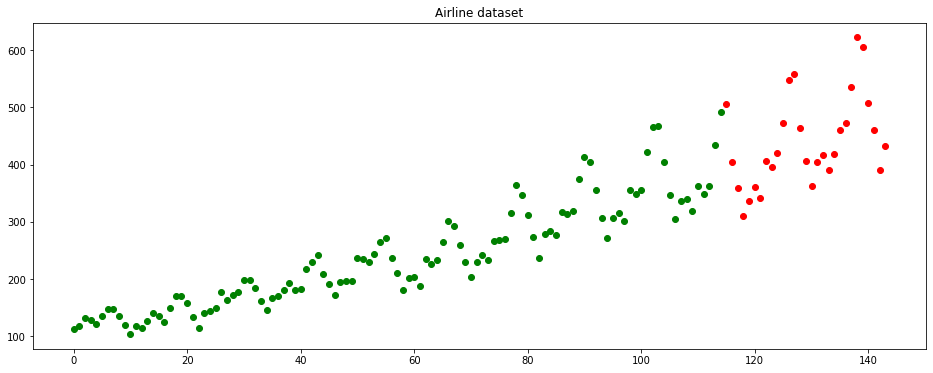

In [515]:
%matplotlib inline
import matplotlib.pyplot as plt

data = np.loadtxt('passenger_data.txt')
x = data[:,0]
y = data[:,1]
r = 0.8 #training vesus all ratio
til_train = int(len(y)*r)
#x = x-til_train

z = 10 * np.sin(x*0.51) * np.exp(x*0.02) + 100 + x*2.49

x_trn = x[:int(len(y)*r)]
y_trn = y[:int(len(y)*r)]

x_tst = x[int(len(y)*r):]
y_tst = y[int(len(y)*r):]
print(y.shape)

plt.figure(figsize=(16, 6))
plt.plot(x_tst,y_tst, 'or')
plt.plot(x_trn,y_trn, 'og')
plt.title('Airline dataset')

In [483]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class modelo_nolineal(nn.Module):

    def __init__(self):
        super(modelo_nolineal, self).__init__()
        #self.a = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        #self.b = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        #self.c = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        #self.d = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        #self.e = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        #self.f = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        self.a = nn.Parameter(torch.tensor([100], dtype=torch.float, requires_grad=True))
        self.b = nn.Parameter(torch.tensor([2], dtype=torch.float, requires_grad=True))
        self.c = nn.Parameter(torch.tensor([10], dtype=torch.float, requires_grad=True))
        self.d = nn.Parameter(torch.tensor([1], dtype=torch.float, requires_grad=True))
        self.e = nn.Parameter(torch.tensor([0.01], dtype=torch.float, requires_grad=True))
        self.f = nn.Parameter(torch.tensor([0], dtype=torch.float, requires_grad=True))

        

    def forward(self, x):
        #return self.a + self.b * x
        bias = self.a
        slope = self.b
        growth = self.c * torch.exp(self.d * x)
        oscillatory = torch.cos(2*np.pi* x/12 + self.f)
        return bias + slope * x + growth * oscillatory
        #return self.a + self.b*x + self.c*x**2 


modelo = modelo_nolineal()
print(modelo)

modelo_nolineal()


In [524]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class modelo_NN(nn.Module):

    def __init__(self):
        super(modelo_NN, self).__init__()
        self.fc1 = nn.Linear(1, 120)  
        self.fc2 = nn.Linear(120, 240)
        self.fc3 = nn.Linear(240, 200)
        self.fc4 = nn.Linear(200, 150)
        self.fc5 = nn.Linear(150, 100)
        self.fc6 = nn.Linear(100, 50)
        self.fc7 = nn.Linear(50, 1)

        

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x = F.relu(self.fc6(x))
        x = self.fc7(x)
        return x


modelo = modelo_NN()
print(modelo)



modelo_NN(
  (fc1): Linear(in_features=1, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=240, bias=True)
  (fc3): Linear(in_features=240, out_features=200, bias=True)
  (fc4): Linear(in_features=200, out_features=150, bias=True)
  (fc5): Linear(in_features=150, out_features=100, bias=True)
  (fc6): Linear(in_features=100, out_features=50, bias=True)
  (fc7): Linear(in_features=50, out_features=1, bias=True)
)


In [525]:
params = list(modelo.parameters())
print("Capas:", len(params))
for i, param in enumerate(params):
    print("Tamaño de parámetro", i+1, "=>", param.size())

Capas: 14
Tamaño de parámetro 1 => torch.Size([120, 1])
Tamaño de parámetro 2 => torch.Size([120])
Tamaño de parámetro 3 => torch.Size([240, 120])
Tamaño de parámetro 4 => torch.Size([240])
Tamaño de parámetro 5 => torch.Size([200, 240])
Tamaño de parámetro 6 => torch.Size([200])
Tamaño de parámetro 7 => torch.Size([150, 200])
Tamaño de parámetro 8 => torch.Size([150])
Tamaño de parámetro 9 => torch.Size([100, 150])
Tamaño de parámetro 10 => torch.Size([100])
Tamaño de parámetro 11 => torch.Size([50, 100])
Tamaño de parámetro 12 => torch.Size([50])
Tamaño de parámetro 13 => torch.Size([1, 50])
Tamaño de parámetro 14 => torch.Size([1])


### Función de perdida
Una función de perdida toma una salida y el objetivo de su valor para calcular una medida de error. Por ejemplo, el `nn.MSELoss` que calcula el error de escuadrados mínimos:

In [526]:
input = torch.randn(1)
out = modelo(input)
print(out)  # tensor con tamaño 1x10

tensor([-0.0037], grad_fn=<AddBackward0>)


### Función de perdida
Una función de perdida toma una salida y el objetivo de su valor para calcular una medida de error. Por ejemplo, el nn.MSELoss que calcula el error de escuadrados mínimos:

In [527]:
output = modelo(input)
target = torch.randn(1)  # a dummy target, for example
criterion = nn.MSELoss()

loss = criterion(output, target)
print(loss)

tensor(0.2253, grad_fn=<MseLossBackward>)


Usamos propagación hacia atrás para empotrar los valores de error en nuestros cadas de red neuronal. En PyTorch hacemos el "backprop" simplemente usando `backward()` en la salida de función de perdida:

In [528]:
modelo.zero_grad()  # borrar los valores de antes de todos parámetros

loss.backward()

#modelo.a.grad
#net.conv1.bias.grad

### Actualizar los pesos
El método más simple de actualizar los pesos es el "Stochastic Gradient Descent (SGD)". En PyTorch podemos usar el packete `torch.optim` que nos da implementaciones de varios tipos de reglas de actualizar (como SGD, Nesterov-SGD, Adam, RMSProp, ...).

In [529]:
# create your optimizer
optimizer = torch.optim.SGD(modelo.parameters(), lr=0.01)

# in your training loop:
optimizer.zero_grad()   # zero the gradient buffers
output = modelo(input)
loss = criterion(output, target)
loss.backward()
optimizer.step()    # Does the update


### entrenamiento

In [536]:
import torch.utils.data as utils

tensor_x = torch.from_numpy(x_trn)
tensor_y = torch.from_numpy(y_trn)

dataset_tr = utils.TensorDataset(tensor_x,tensor_y) # create your datset
trainloader = utils.DataLoader(dataset_tr,batch_size=1) # create your dataloader

In [547]:

modelo = modelo_NN()

optimizer = torch.optim.Adagrad(modelo.parameters(), lr=0.0001)
criterion = nn.MSELoss()



for epoch in range(100):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        modelo.zero_grad()

        # forward + backward + optimize
        outputs = modelo(inputs.float())
        loss = criterion(outputs, labels.float())
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
    #print('[%d, %5d] loss: %.3f' %(epoch + 1, i + 1, running_loss / 2000))
    print(running_loss)
    running_loss = 0.0

print('Finished Training')
print(running_loss)

7422391.1787109375
7279949.298828125
7136885.4365234375
6980952.4658203125
6807734.0439453125
6607543.6669921875
6384674.380859375
6138552.408203125
5870537.9638671875
5580164.728515625
5266092.5341796875
4930935.806640625
4583783.2578125
4230290.14453125
3851054.16015625
3470781.9038085938
3106309.4389648438
2757603.0424804688
2428622.9814453125
2121960.6489257812
1841985.6447753906
1589570.8986816406
1367384.1177978516
1173103.8663330078
1009215.7639465332
874159.6721730763
764347.3512334824
676847.2739725113
609034.6830835342
557675.4516393542
519482.4065731168
491432.9368275702
471082.77743530273
456456.8549222946
446026.9126418829
438622.86236678436
433381.45448972285
429673.0133776665
427036.19781823456
425181.761282444
423830.8285961151
422827.7999468744
422239.20942203794
421673.56023706496
421239.96658849716
420992.2907010317
420720.7224936485
420642.95154356956
420428.0339303613
420383.1367902756
420297.9702464342
420224.8958785534
420171.49846573174
420126.8121192306
420059.

In [543]:
plt.figure(figsize=(16, 6))
plt.plot(tensor_x.numpy(),modelo(tensor_x.float()).detach().numpy())
plt.plot(tensor_x.numpy(),tensor_y.numpy())
plt.plot(x_tst,y_tst, 'or')
plt.plot(x_trn,y_trn, 'og')
plt.title('Airline dataset')

RuntimeError: size mismatch, m1: [1 x 115], m2: [1 x 120] at /Users/distiller/project/conda/conda-bld/pytorch_1570710797334/work/aten/src/TH/generic/THTensorMath.cpp:197

<Figure size 1152x432 with 0 Axes>

## Redes Neuronales

Para definir una red en PyTorch en general se siguen los siguentes pasos.

* Definir la red que tenga parámetros entrenables (pesos)
* Iterar sobre el dataset de inputs
* Procesas el input a través de la red
* Calcular la función de perdida (loss)
* Propagar los gradientes hacia los parametros de la red
* Actualizar los pesos de la red siguiendo una regla, en general se usa gradiente decendiente.

### Crear una red

In [32]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 3x3 square convolution
        # kernel
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 5 * 5, 120)  # 5*5 from image dimension
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
print(net)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [33]:
params = list(net.parameters())
print("Capas:", len(params))
for i, param in enumerate(params):
    print("Tamaño de parámetros de capa", i+1, "=>", param.size())

Capas: 10
Tamaño de parámetros de capa 1 => torch.Size([6, 3, 5, 5])
Tamaño de parámetros de capa 2 => torch.Size([6])
Tamaño de parámetros de capa 3 => torch.Size([16, 6, 5, 5])
Tamaño de parámetros de capa 4 => torch.Size([16])
Tamaño de parámetros de capa 5 => torch.Size([120, 400])
Tamaño de parámetros de capa 6 => torch.Size([120])
Tamaño de parámetros de capa 7 => torch.Size([84, 120])
Tamaño de parámetros de capa 8 => torch.Size([84])
Tamaño de parámetros de capa 9 => torch.Size([10, 84])
Tamaño de parámetros de capa 10 => torch.Size([10])


Vamos a entregar una entrada aleatoria de tamaño 1x3x32x32. Es decir que un "batch" de un elemento, tres colores, altura 32 y ancho 32. Es `nn.Conv2d` acepta un tensor de quatro dimensiones de `nSamples x nChannels x Height x Width`.

In [34]:
input = torch.randn(1, 3, 32, 32)
out = net(input)
print(out)  # tensor con tamaño 1x10

tensor([[ 0.1266,  0.0111, -0.0437,  0.1712,  0.0640,  0.0626, -0.0435,  0.0796,
         -0.0925,  0.1520]], grad_fn=<AddmmBackward>)


### Función de perdida
Una función de perdida toma una salida y el objetivo de su valor para calcular una medida de error. Por ejemplo, el `nn.MSELoss` que calcula el error de escuadrados mínimos:

In [35]:
output = net(input)
target = torch.randn(10)  # a dummy target, for example
target = target.view(1, -1)  # make it the same shape as output
criterion = nn.MSELoss()

loss = criterion(output, target)
print(loss)

tensor(0.8436, grad_fn=<MseLossBackward>)


Usamos propagación hacia atrás para empotrar los valores de error en nuestros cadas de red neuronal. En PyTorch hacemos el "backprop" simplemente usando `backward()` en la salida de función de perdida:

In [36]:
net.zero_grad()  # borrar los valores de antes de todos parámetros

loss.backward()

net.conv1.bias.grad

tensor([ 0.0217,  0.0044, -0.0050,  0.0213, -0.0016,  0.0191])

### Actualizar los pesos
El método más simple de actualizar los pesos es el "Stochastic Gradient Descent (SGD)". En PyTorch podemos usar el packete `torch.optim` que nos da implementaciones de varios tipos de reglas de actualizar (como SGD, Nesterov-SGD, Adam, RMSProp, ...).

In [37]:
# create your optimizer
optimizer = torch.optim.SGD(net.parameters(), lr=0.01)

# in your training loop:
optimizer.zero_grad()   # zero the gradient buffers
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step()    # Does the update

## Red neuronal ejemplo
Vamos a usar `torchvision` para cargar un base de datos de imágenes. Instala con `conda install torchvision`.

In [38]:
import torchvision
import torchvision.transforms as transforms

In [39]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


Mostramos unos imágenes que tenemos en el set de entrenamiento:

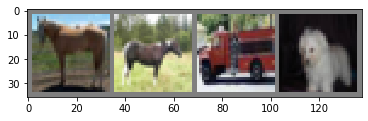

horse horse truck   dog


In [40]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images

dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

Elejamos una función criteria y de perdida:

In [41]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

Entrenar:

In [42]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.219
[1,  4000] loss: 1.859
[1,  6000] loss: 1.714
[1,  8000] loss: 1.625
[1, 10000] loss: 1.560
[1, 12000] loss: 1.514
[2,  2000] loss: 1.441
[2,  4000] loss: 1.420
[2,  6000] loss: 1.378
[2,  8000] loss: 1.335
[2, 10000] loss: 1.317
[2, 12000] loss: 1.289
Finished Training


In [43]:
torch.save(net.state_dict(), './cifar_net.pth') # guardar

Tomamos cuatro imágenes aleatorios para ver si la red funciona:

In [44]:
dataiter = iter(testloader)

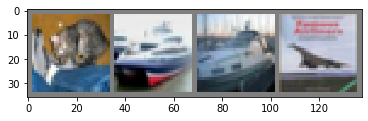

GroundTruth:    cat  ship  ship plane


In [45]:
# print images
images, labels = dataiter.next()
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

Apliquemos la red y verifiquemos la salida:

In [46]:
outputs = net(images)

_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat   car  ship  ship


¿Qué tal funciona la red en los categorías?

Accuracy of plane : 56 %
Accuracy of   car : 68 %
Accuracy of  bird : 33 %
Accuracy of   cat : 35 %
Accuracy of  deer : 29 %
Accuracy of   dog : 61 %
Accuracy of  frog : 64 %
Accuracy of horse : 67 %
Accuracy of  ship : 57 %
Accuracy of truck : 66 %


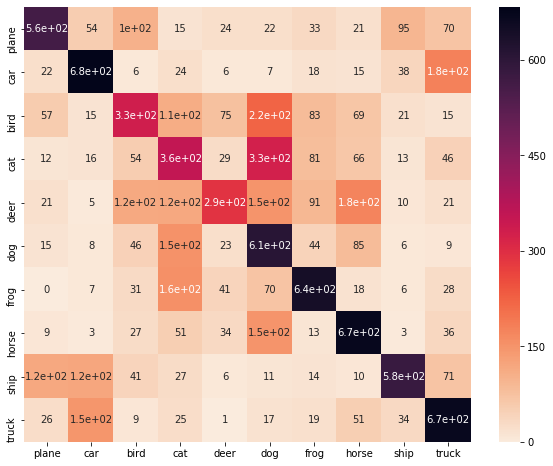

In [56]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

label_list = torch.zeros(0, dtype=torch.long)
pred_list = torch.zeros(0, dtype=torch.long)

class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        
        label_list = torch.cat([label_list, labels.view(-1)])
        pred_list = torch.cat([pred_list, predicted.view(-1)])
        
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

# Confusion matrix
conf_mat = confusion_matrix(label_list.numpy(), pred_list.numpy())
df_cm = pd.DataFrame(conf_mat, index=classes, columns=classes)

plt.figure(figsize=(10,8))
sn.heatmap(df_cm, annot=True, cmap='rocket_r')

b, t = plt.ylim()
plt.ylim(b+0.5, t-0.5)
plt.show()

## Entranar en el GPU
Para verificar si tienes un GPU de Nvidia y has instalado CUDA (que es un método de acceder el GPU a través código), executamos:

In [54]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


Para usar el red en el GPU (si lo de arriba dice `cuda:0`), tenemos que mudar todo los datos y la red hacia el GPU:

In [55]:
net.to(device)
inputs, labels = data[0].to(device), data[1].to(device)